#Visão Computacional

##Detecção de faces

In [1]:
import cv2 #OpenCV

In [19]:
imagem = cv2.imread('/content/Business_Study-1024x683.jpg')

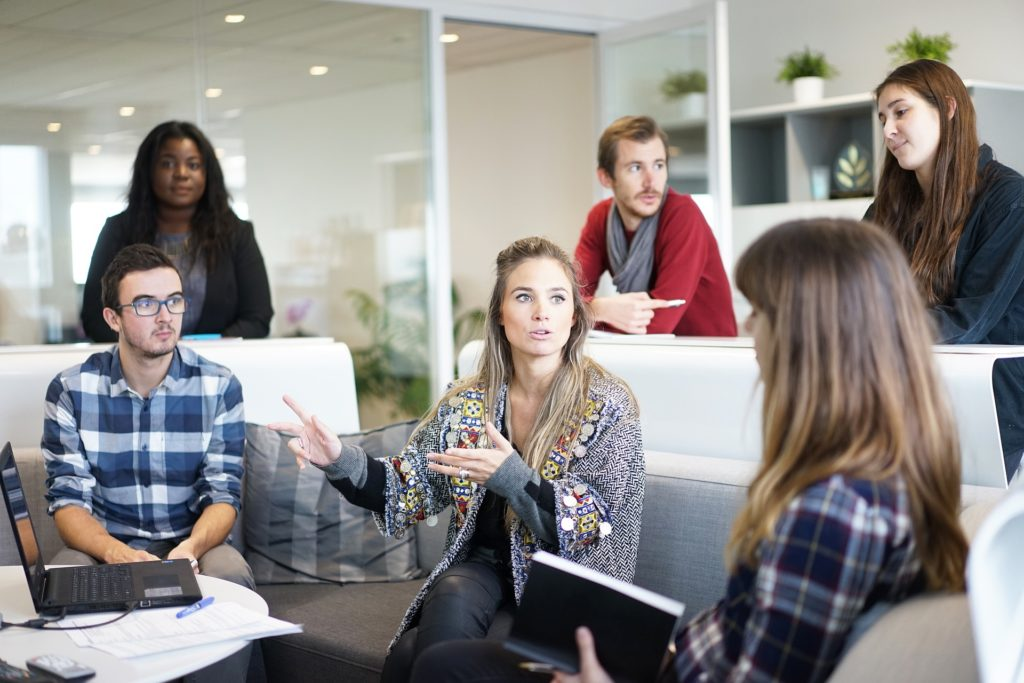

In [20]:
from google.colab.patches import cv2_imshow
cv2_imshow(imagem)

In [21]:
detector_face = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

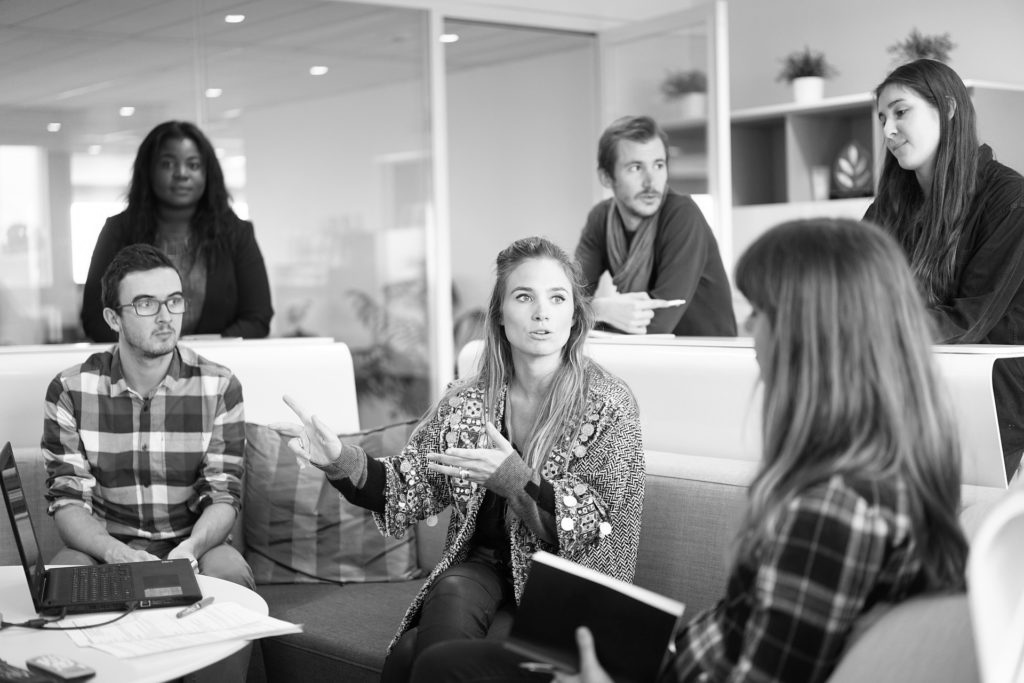

In [22]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem_cinza)

In [27]:
deteccoes = detector_face.detectMultiScale(imagem_cinza, scaleFactor=1.3, minSize=(30, 30))

In [28]:
deteccoes

array([[868,  80,  84,  84],
       [151, 141,  60,  60],
       [614, 141,  67,  67],
       [497, 262,  89,  89],
       [120, 269,  81,  81]], dtype=int32)

In [29]:
len(deteccoes)

5

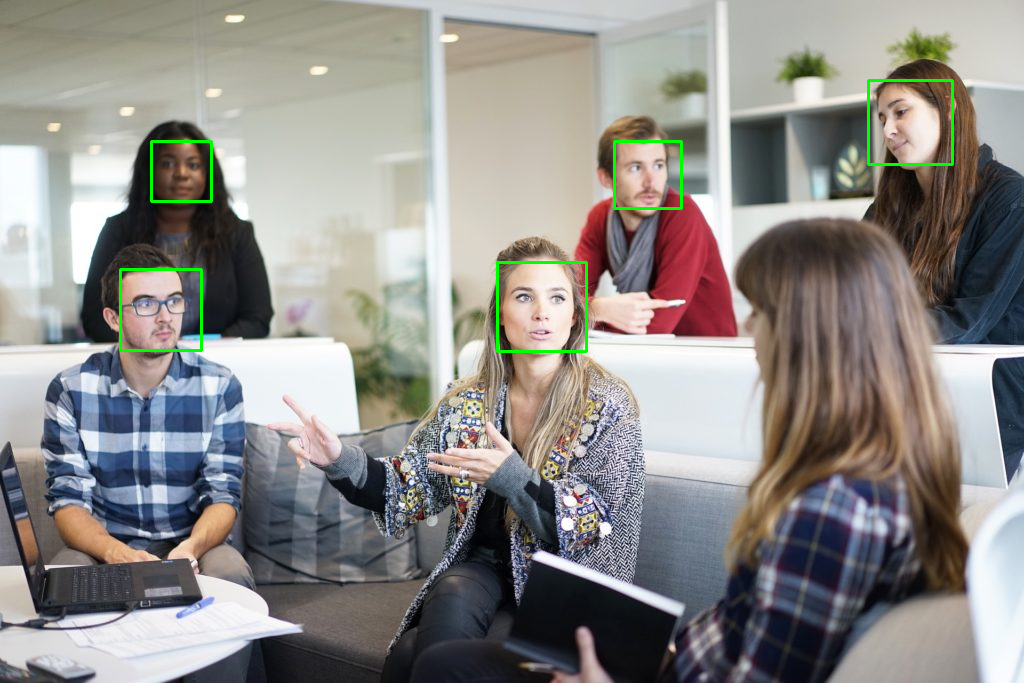

In [30]:
for (x, y, l, a)in deteccoes:
  cv2.rectangle(imagem, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(imagem)

##Detecção do corpo

9
[[ 16  66  78 157]
 [462  63  88 175]
 [ 74  75  86 173]
 [267  85  74 147]
 [197  53  93 186]
 [139  78  81 162]
 [532 109  64 128]
 [326  71  83 167]
 [396  60  89 177]]


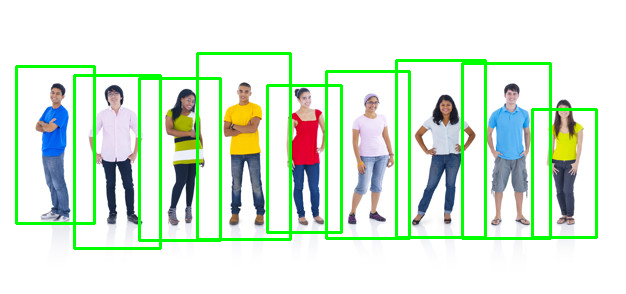

In [38]:
image = cv2.imread('/content/pessoas.jpg')
detector_corpo = cv2.CascadeClassifier('/content/fullbody.xml')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = detector_corpo.detectMultiScale(image_gray, scaleFactor=1.01, minSize=(50,50))
print(len(detections))
print(detections)
for (x, y, l, a) in detections:
  cv2.rectangle(image, (x, y), (x + l, y + a), (0,255,0), 2)
cv2_imshow(image)

#Reconhecimento facial

##Treinamento

In [39]:
from PIL import Image
import numpy as np


In [46]:
import os
os.listdir('/content/yalefaces/train')

['subject04.sad.gif',
 'subject12.sad.gif',
 'subject05.rightlight.gif',
 'subject14.happy.gif',
 'subject11.normal.gif',
 'subject04.glasses.gif',
 'subject13.centerlight.gif',
 'subject08.leftlight.gif',
 'subject06.noglasses.gif',
 'subject05.normal.gif',
 'subject01.leftlight.gif',
 'subject10.surprised.gif',
 'subject08.surprised.gif',
 'subject04.wink.gif',
 'subject06.wink.gif',
 'subject02.sad.gif',
 'subject04.noglasses.gif',
 'subject07.sleepy.gif',
 'subject14.noglasses.gif',
 'subject03.centerlight.gif',
 'subject10.noglasses.gif',
 'subject12.leftlight.gif',
 'subject10.leftlight.gif',
 'subject11.surprised.gif',
 'subject06.sad.gif',
 'subject05.happy.gif',
 'subject03.noglasses.gif',
 'subject09.glasses.gif',
 'subject14.centerlight.gif',
 'subject02.happy.gif',
 'subject15.normal.gif',
 'subject15.sleepy.gif',
 'subject06.centerlight.gif',
 'subject08.noglasses.gif',
 'subject09.sleepy.gif',
 'subject08.happy.gif',
 'subject12.wink.gif',
 'subject12.happy.gif',
 'subjec

In [40]:
import zipfile
path = '/content/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [49]:
def dados_imagem():
  caminhos = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for caminho in caminhos:
    if caminho == '/content/yalefaces/train/.ipynb_checkpoints':
      continue
    imagem = Image.open(caminho).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

In [50]:
ids, faces = dados_imagem()

In [51]:
print(ids)

[ 4 12  5 14 11  4 13  8  6  5  1 10  8  4  6  2  4  7 14  3 10 12 10 11
  6  5  3  9 14  2 15 15  6  8  9  8 12 12 11 13 15 15  2  1 14  1 11 10
  4 12  8 13  3  3  5  6  3  3 13  9 10  7  9 14  9  4  8  2  7 10  4  1
  8 12 11  1 14  7 14  9 10  4  7  1  1 12  6  7  9 13  7 11 11 13  5  1
  5  5  2  6  8 11  2 12  2  8  6  1  2 14  7 14  6  9  5  3 13 15 10  5
 13 10  7 15 11 12  4  2 15 15  3  3  9 13 15]


In [52]:
print(faces[0])

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 251 255 255]
 [255 255 255 ... 225 236 244]
 [ 68  68  68 ...  68  68  68]]


In [53]:
lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

##Classificações

In [54]:
reconhecedor = cv2.face.LBPHFaceRecognizer_create()
reconhecedor.read('/content/classificadorLBPH.yml')

In [55]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'

In [57]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
print(imagem_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 241 255 255]
 [255 255 255 ... 234 237 252]
 [ 68  68  68 ...  68  68  68]]


In [58]:
idprevisto, _ = reconhecedor.predict(imagem_np)
idprevisto

10

In [60]:
idcorreto = id = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
idcorreto

10

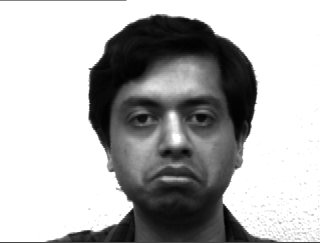

In [63]:
cv2.putText(imagem_np, 'P: ' + str(idprevisto), (x, y + 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
cv2_imshow(imagem_np)